# Tutorial: point cloud processing using Open3d

In this tutorial, we will see how to process point clouds to produce watertight meshes or to analyse the geometry of the acquired scene, using Python.

## Dependencies

To this end, we will use the following tools:
 - Dataset: https://3dard.cnrs.fr. Data will be fetched using the python front-end https://github.com/3D-ARD/python-module
 - Processing library: http://www.open3d.org/. Checkout the documentation at http://www.open3d.org/docs/latest 
 
Read the documentation of each project to know how to install and use it.

## Perequisite

In this first section, we demonstrate how to load point clouds from 3dard, and visualize them using open3d.

See this as a sandbox, and feel free to experiment.

In [19]:
# import dependencies
from ThreeDARD import *
import open3d as o3d

In [20]:
# Link to local file system
if not dataset.isInitialized(): 
    dataset.init("./dataset")

In [21]:
# List all assets availables
d = dataset.getDatasetMeta()
print (d["assets"])

    Retrieve assets.json from cache
['Bone', 'Charango', 'Great_tit_skull', 'Haut_Carre', 'Junk_ship', 'Lady_of_Elche', 'Maitreya_Buddha']


In [22]:
# Get unit metadata, download point cloud and display
unit=dataset.getUnitMeta("Maitreya_Buddha", "0006")
print(unit)

    Retrieve Maitreya_Buddha/0006/unit.json from cache
{'name': 'Scans', 'slug': 'scans', 'author': 'MARCADET Quentin <quentin.marcadet@gmail.com>', 'type': 'acquired', 'id': '0006', 'hardware': ['HandyScan Creaform'], 'software': ['Geomagic Wrap'], 'description': 'Set of 3 unaligned scans of Maitreya Buddha Statue in .ply format file with their text files containing point coordinates', 'details': '', 'inputs': [], 'related': [], 'outputs': [{'filename': 'scan01.ply'}, {'filename': 'scan02.ply'}, {'filename': 'scan03.ply'}]}


In [35]:
# Function that load a file and return it as an open3d point cloud
# param path string indicating where the file is located. Can be retrieved using getUnitDataPath
# param color array indicating the color to be applied on the point cloud for display, eg [1, 0.706, 0]
def loadPointCloud(path, color=None):
    m = o3d.io.read_point_cloud(plypath)
    if not color is None:
        m.paint_uniform_color(color)
    return m
    

In [36]:
# Load all scans
scans = []
for unitData in unit['outputs']:
    plypath = dataset.getUnitDataPath("Maitreya_Buddha", "0006", unitData['filename'])
    scans.append( loadPointCloud(plypath,np.random.rand(3)))
print (scans)

    Retrieve Maitreya_Buddha/0006/scan01.ply from cache
    Retrieve Maitreya_Buddha/0006/scan02.ply from cache
    Retrieve Maitreya_Buddha/0006/scan03.ply from cache
[PointCloud with 2403956 points., PointCloud with 2964755 points., PointCloud with 2346858 points.]


In [ ]:
# Display point clouds
o3d.visualization.draw_geometries(scans)

You should get a window with something like this:

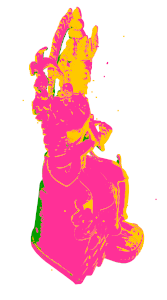

## Assignment 1: Reconstruct watertight mesh
Starting from the serie of point clouds of the Maitreya_Buddha, reconstruct a unique mesh representing the entire object.

A pipeline would be:
 - Compute normals
 - Refine registration
 - Reconstruct mesh

Outcomes: generate a zip file containing your python script (or a jupyter notebook) *and* the generated data. Your code should be documented: explain how the pipeline works, what choices have you made, and what are the outputs.

## Assignment 2: Indoor scene analysis with massive point clouds
We now focus on the Haute Carré asset:

In [45]:
# Get asset metadata
assetName = "Haut_Carre"
asset=dataset.getAssetMeta(assetName)
print(asset)

    Retrieve Haut_Carre/asset.json from cache
{'name': 'Haut Carre', 'slug': 'haut_carre', 'uuid': '0000', 'description': 'Annex building of the Haut Carre, Bordeaux University', 'owner': 'Bordeaux University, Talence (France, Gironde, 33)', 'url': 'https://www.u-bordeaux.fr/Universite/L-universite-de-Bordeaux/Histoire-et-patrimoine/Talence/L-Agora-du-Haut-Carre', 'units': ['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013']}


In [49]:
# List details about the available units
for uname in asset['units']:
    unit=dataset.getUnitMeta(assetName, uname)
    print (unit['name'] + ": " + unit['description'])

    Retrieve Haut_Carre/0000/unit.json from cache
Raw Pictures Exterior: Set of JPG and NEF pictures. Exterior of the annexe building
    Retrieve Haut_Carre/0001/unit.json from cache
Raw Pictures Exterior Drone: Set of JPG, DNG and xmp pictures. Exterior with drone of the annexe building
    Retrieve Haut_Carre/0002/unit.json from cache
Raw Pictures Interior: Set of JPG and NEF pictures. Interior of the annexe building
    Retrieve Haut_Carre/0003/unit.json from cache
Modified Pictures Exterior: Set of JPG pictures, modified to adjust black and white level. Exterior ofthe annex building
    Retrieve Haut_Carre/0004/unit.json from cache
Modified Pictures Interior: Set of JPG pictures, modified to adjust black and white level. Interior of the annex building
    Retrieve Haut_Carre/0005/unit.json from cache
Scans Totality Annex Building E57: Set of .e57 of the totality of the annex building. Exterior and interior
    Retrieve Haut_Carre/0006/unit.json from cache
Scans Totality Frame E57:

_________________
As you can see, there are very large point clouds, made of hunders of thousands of points.

**Objectives:**

The goal of this exercise is to define a pipeline allowing to load, align, visualize, and analyse the geometry of the scene (e.g. primitive detection).
In order the handle the size of the data, you might need to sample the input point clouds.

In [51]:
# Here you go !